In [2]:
import pandas as pd

df = pd.read_excel("crm_subat_output_openai_ollama.xlsx")
df.head()

,Ticket,Class,openai_class,class_match,is_web,is_relevant,ollama_class,openai vs ollama,Agent,Requirement,Channel,Status,Type,llm_type,type_match,Comment,Datetime
0,T166319,YENİLEME BAŞVURUSU,TEKNİK DESTEK,0.0,0.0,0.0,Müşteri Hizmetlerine Ulaşamama Sorunu,0.0,Hilal sude Kaba,merhaba müşterimiz e devlet adımlarını yapamam...,Çağrı Merkezi,Çözümlendi,İşlem,İstek,0.0,Müşteri arandı ancak meşgule atması nedeni ile...,2025-02-28 16:27:20
1,T166318,ZAMAN DAMGASI,ZAMAN DAMGASI,1.0,0.0,1.0,ZAMAN DAMGASI,1.0,SÜMEYYE SÖYLER,müşterimiz zaman damgası kullanıcı bilgilerini...,Çağrı Merkezi,Çözümlendi,İşlem,İstek,0.0,Müşteriye puk gönderildi imza yanında değil. T...,2025-02-28 15:53:42
2,T166317,SERTİFİKA AKTARIM,SERTİFİKA AKTARIM,1.0,0.0,1.0,SERTİFİKA AKTARIM,1.0,NEJAT TIRNOVALI,"Aktarım ücretini yatırmış ,kimlik doğrulamasın...",Çağrı Merkezi,Çözümlendi,İşlem,Bilgi,0.0,Müşteri arandı ancak ulaşılamadı. E-devlet kim...,2025-02-28 15:34:40
3,T166316,TEKNİK DESTEK,ZAMAN DAMGASI,0.0,0.0,0.0,ZAMAN DAMGASI,1.0,ABDULLAH CAN,zaman damgası ile ilgili desteğinizi rica ederim.,Çağrı Merkezi,Çözümlendi,İşlem,İstek,0.0,Müşterimiz arandı ancak meşgul. GD.,2025-02-28 15:18:44
4,T166315,Kurulum Talebi,Kurulum Talebi,1.0,0.0,1.0,Kurulum Talebi,1.0,Senanur Paksoy,Senanur Paksoy isimli müşteri için siparişin...,Telefon,Açık,İstek,İstek,1.0,NaN,2025-02-28 15:14:54


In [3]:
df.describe(include='all')

,Ticket,Class,openai_class,class_match,is_web,is_relevant,ollama_class,openai vs ollama,Agent,Requirement,Channel,Status,Type,llm_type,type_match,Comment,Datetime
count,459,459,459,461.00000,461.000000,461.000000,459,461.000000,459,458,455,459,459,459,460.000000,421,459
unique,459,21,18,NaN,NaN,NaN,19,NaN,358,438,3,3,7,8,NaN,334,NaN
top,T166319,WEB,YENİLEME BAŞVURUSU,NaN,NaN,NaN,PIN-PUK BİLGİSİ - ŞİFRE BLOKESİ (Token ),NaN,Necip ÖZ,aktarım için desteğinizi rica ederim,Çağrı Merkezi,Çözümlendi,İşlem,İstek,NaN,Müşterimiz arandı ancak ulaşılamadı. GD.,NaN
freq,1,101,97,NaN,NaN,NaN,140,NaN,4,4,349,447,343,281,NaN,11,NaN
mean,NaN,NaN,NaN,0.80782,0.438655,1.237789,NaN,1.007604,NaN,NaN,NaN,NaN,NaN,NaN,0.304348,NaN,2025-02-15 04:34:48.328976384
min,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2025-02-01 11:16:27
25%,NaN,NaN,NaN,0.00000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2025-02-07 12:07:46
50%,NaN,NaN,NaN,0.00000,0.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2025-02-14 15:42:42
75%,NaN,NaN,NaN,1.00000,0.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2025-02-21 12:02:20.500000
max,NaN,NaN,NaN,186.00000,101.000000,285.000000,NaN,232.000000,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,NaN,2025-02-28 16:27:20


/var/folders/pw/p0_ghk_n5g93fq5ynxs3ys8c0000gn/T/ipykernel_51323/906451302.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


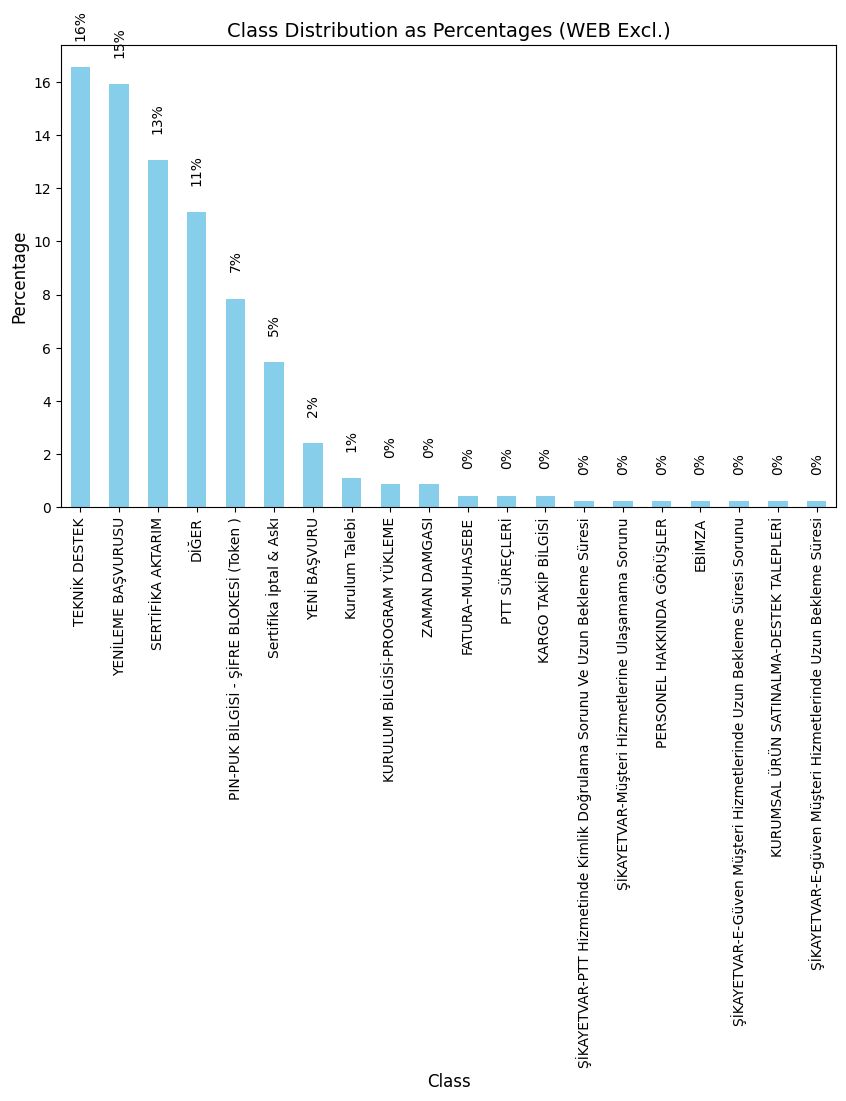

In [5]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution
class_counts = df['Class'].value_counts(normalize=True) * 100
class_counts = class_counts[class_counts.index != 'WEB']
# Plot the distribution
ax = class_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add percentage labels
for i, value in enumerate(class_counts):
    ax.text(i, value + 1, f'{int(value)}%', ha='center', va='bottom', fontsize=10, rotation=90)

# Set labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Class Distribution as Percentages (WEB Excl.)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

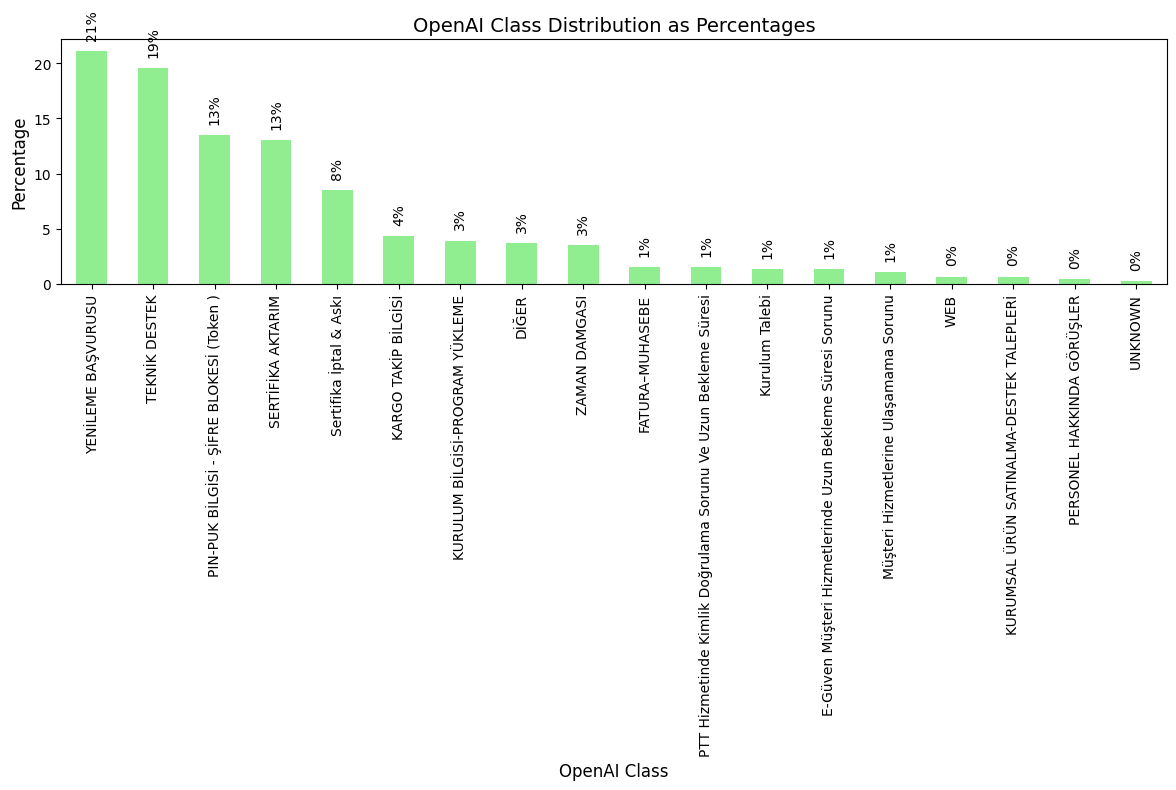

In [6]:
# Calculate the percentage distribution for openai_class
openai_class_counts = df['openai_class'].value_counts(normalize=True) * 100

# Plot the distribution
ax = openai_class_counts.plot(kind='bar', figsize=(10, 6), color='lightgreen')

# Add percentage labels
for i, value in enumerate(openai_class_counts):
    ax.text(i, value + 1, f'{int(value)}%', ha='center', va='bottom', fontsize=10, rotation=90)
    plt.gcf().set_size_inches(12, 8)
# Set labels and title
plt.xlabel('OpenAI Class', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('OpenAI Class Distribution as Percentages', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

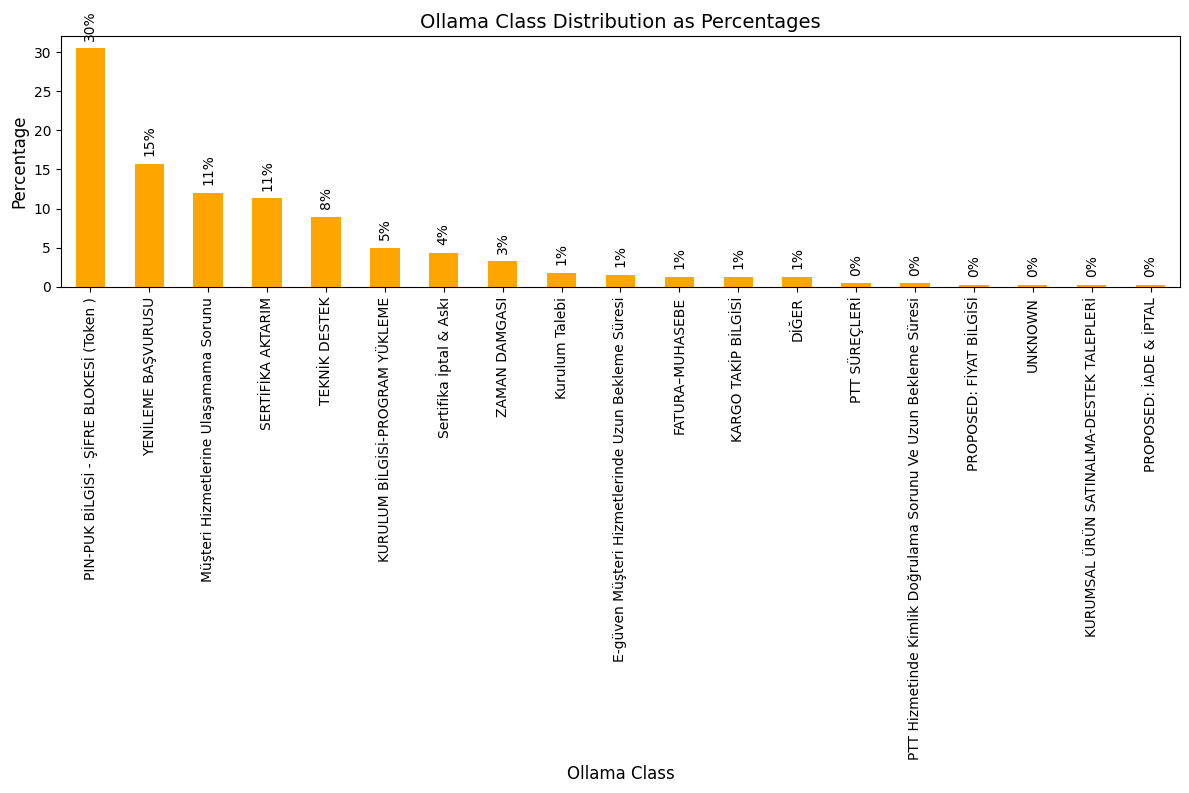

In [7]:
# Calculate the percentage distribution for ollama_class
ollama_class_counts = df['ollama_class'].value_counts(normalize=True) * 100
# Adjust the figure size to make the plot longer
ax = ollama_class_counts.plot(kind='bar', figsize=(12, 8), color='orange')

# Add percentage labels
for i, value in enumerate(ollama_class_counts):
    ax.text(i, value + 1, f'{int(value)}%', ha='center', va='bottom', fontsize=10, rotation=90)
# Set labels and title
plt.xlabel('Ollama Class', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Ollama Class Distribution as Percentages', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
import sqlite3

# SQLite veritabanı bağlantısı oluştur
conn = sqlite3.connect('crm_subat.db')

# DataFrame'i SQLite tablosu olarak kaydet
df.to_sql('crm_subat_output_openai_ollama', conn, if_exists='replace', index=False)

# Bağlantıyı kapat
conn.close()